## importing necessery libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Defining Needed Functions 

In [2]:
## Windoing every 5 second of data
window_size = 360  # Approximately 100 ms at 72 Hz
step_size = 180    # Roughly 50% overlap

## Function to apply Moving Average filter


In [ ]:
def apply_moving_average(data, window_size=360):
    return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


## Function to apply Low-Pass filter

In [ ]:
def apply_low_pass_filter(data, cutoff_freq=25, fs=72, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

## Function to count crossings over the mean (average over window)

In [ ]:
def count_mean_crossings(data):
    mean_value = np.mean(data)
    # Calculate sign changes relative to the mean
    sign_changes = np.diff(np.sign(data - mean_value)) != 0
    return np.sum(sign_changes) / len(data)

# Function to classify a window based on a single feature and threshold

In [ ]:
def classify_window(feature_value, feature_name, class_name):
    class_thresholds = thresholds[feature_name]
    # Simple classification: assign to class with closest median
    min_diff = float('inf')
    predicted_class = None
    for c_name in datasets:
        diff = abs(feature_value - class_thresholds[c_name])
        if diff < min_diff:
            min_diff = diff
            predicted_class = c_name
    return predicted_class



## Visualizing Each Class in Time and Frequency Domain

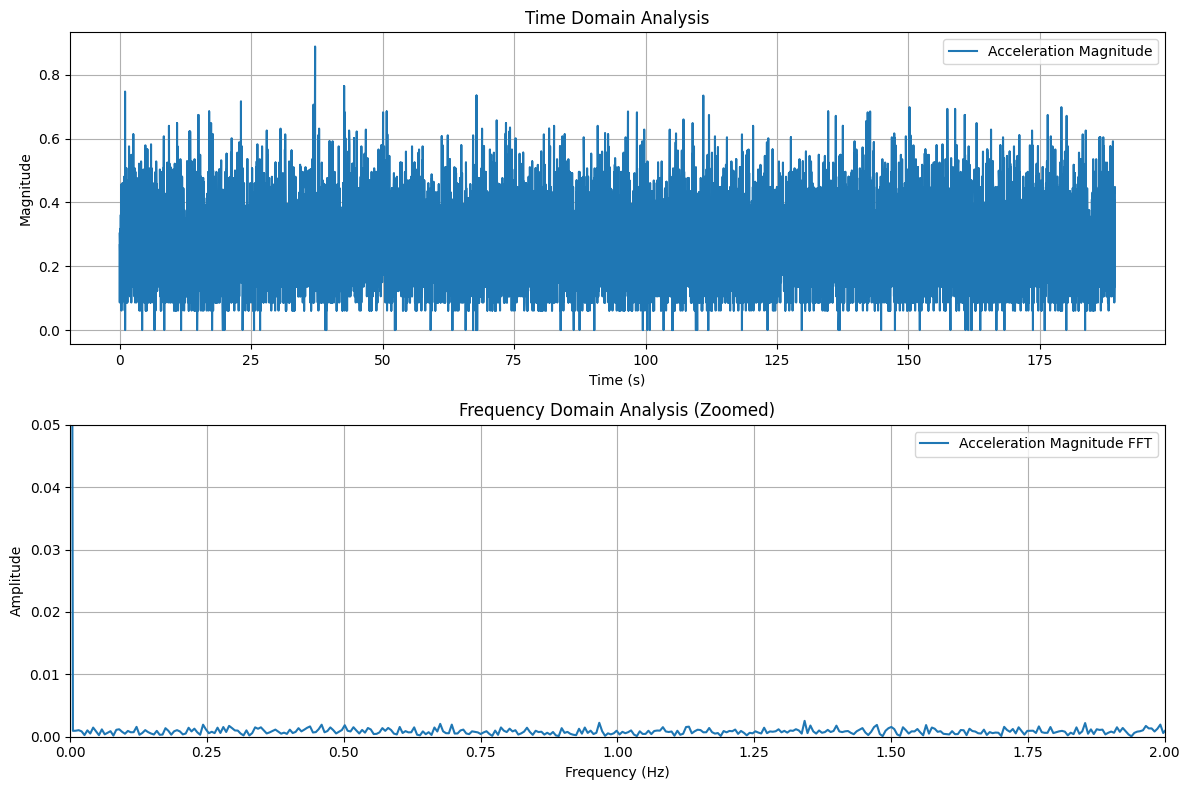

In [7]:
# Read the dataset
df = pd.read_csv('Chair without sitting.csv')

# Calculate magnitude of acceleration and gyroscope
df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
df['Gyr_Magnitude'] = np.sqrt(df['GyrX']**2 + df['GyrY']**2 + df['GyrZ']**2)


# Plot in time domain
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Acc_Magnitude'], label='Acceleration Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Analysis')
plt.legend()
plt.grid()

# Frequency domain analysis for acceleration
N = len(df)
T = (df['Time'].iloc[-1] - df['Time'].iloc[0]) / N  # Sampling interval
freq = fftfreq(N, T)[:N//2]
acc_fft = fft(df['Acc_Magnitude'].values)[:N//2]
acc_fft = np.abs(acc_fft) / N

# Limit frequency range to 0 to 2 Hz and amplitude to 0 to 0.05
plt.subplot(2, 1, 2)
plt.plot(freq, acc_fft, label='Acceleration Magnitude FFT')
plt.xlim(0, 2)  # Restrict frequency axis to 0-0.05 Hz
plt.ylim(0, 0.05)  # Restrict amplitude axis to 0-0.05
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis (Zoomed)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

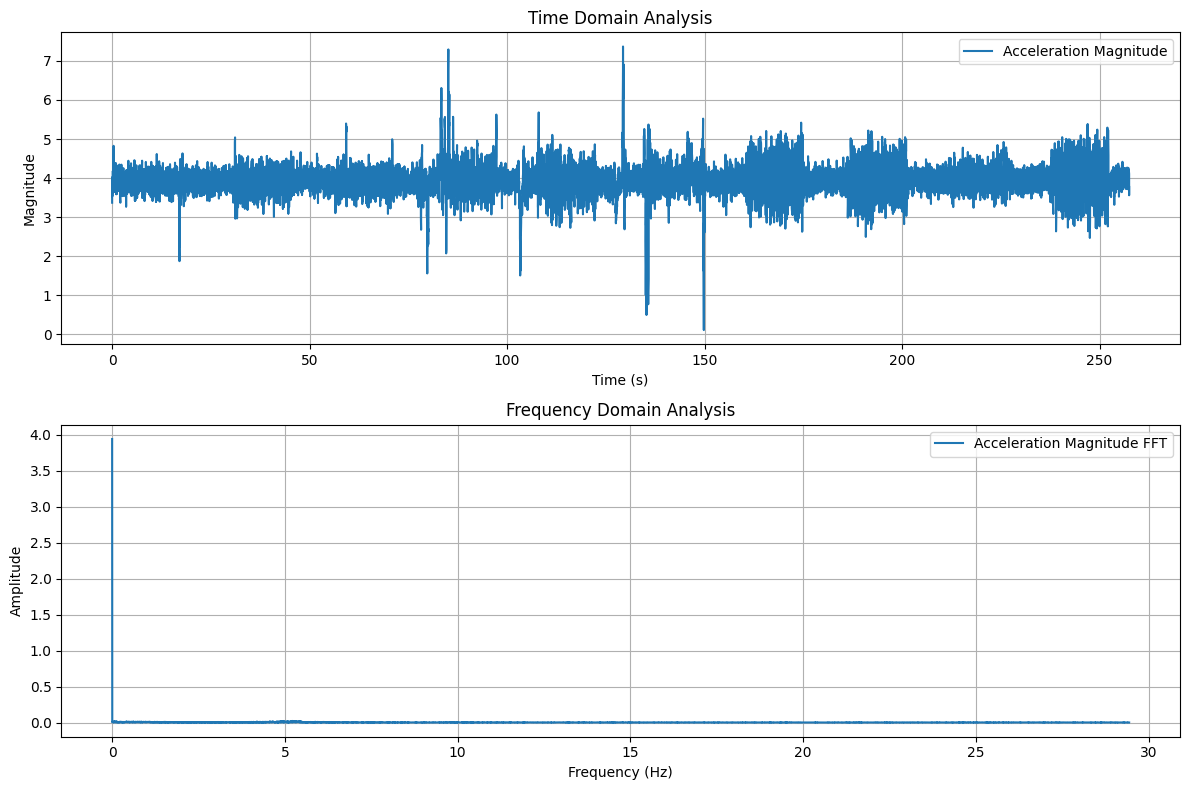

In [8]:
# Read the dataset
df = pd.read_csv('Nervous tic.csv')

# Calculate magnitude of acceleration and gyroscope
df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
df['Gyr_Magnitude'] = np.sqrt(df['GyrX']**2 + df['GyrY']**2 + df['GyrZ']**2)


# Plot in time domain
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Acc_Magnitude'], label='Acceleration Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Analysis')
plt.legend()
plt.grid()

# Frequency domain analysis for acceleration
N = len(df)
T = (df['Time'].iloc[-1] - df['Time'].iloc[0]) / N  # Sampling interval
freq = fftfreq(N, T)[:N//2]
acc_fft = fft(df['Acc_Magnitude'].values)[:N//2]
acc_fft = np.abs(acc_fft) / N

plt.subplot(2, 1, 2)
plt.plot(freq, acc_fft, label='Acceleration Magnitude FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

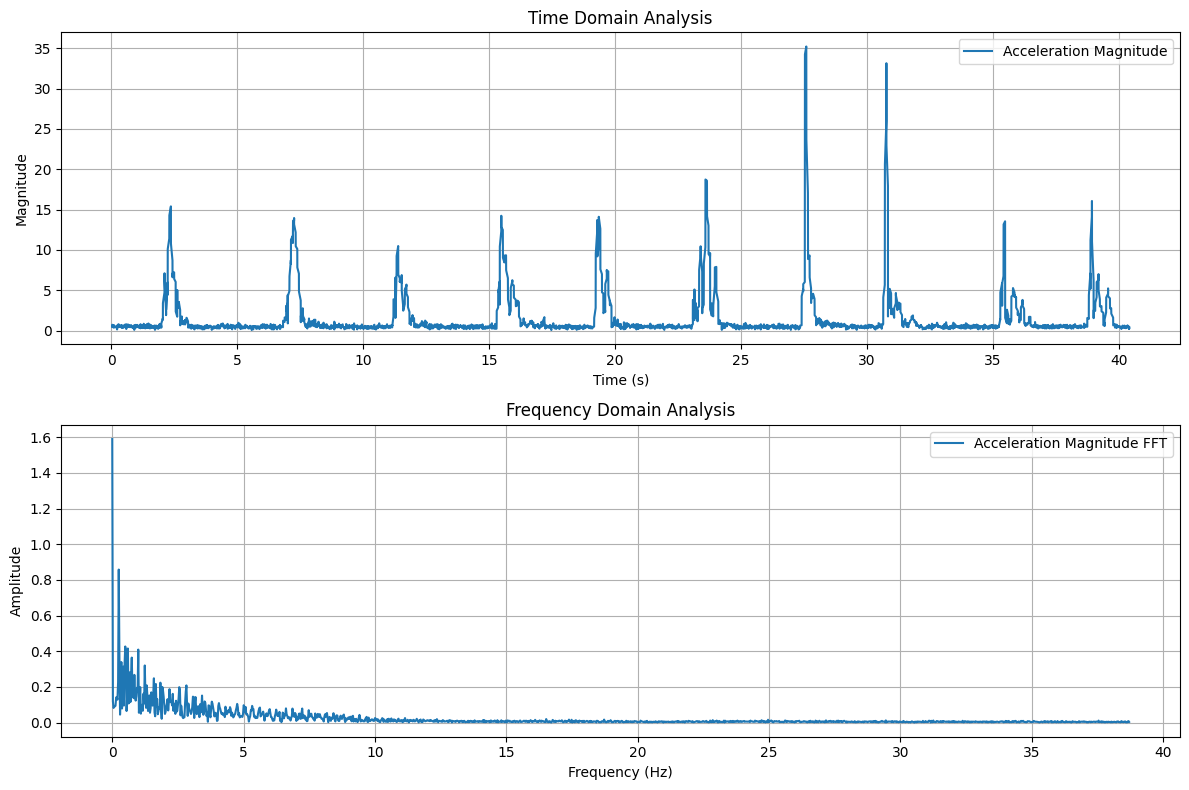

In [9]:
df = pd.read_csv('Sit.csv')

# Calculate magnitude of acceleration and gyroscope
df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
df['Gyr_Magnitude'] = np.sqrt(df['GyrX']**2 + df['GyrY']**2 + df['GyrZ']**2)


# Plot in time domain
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Acc_Magnitude'], label='Acceleration Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Analysis')
plt.legend()
plt.grid()

# Frequency domain analysis for acceleration
N = len(df)
T = (df['Time'].iloc[-1] - df['Time'].iloc[0]) / N  # Sampling interval
freq = fftfreq(N, T)[:N//2]
acc_fft = fft(df['Acc_Magnitude'].values)[:N//2]
acc_fft = np.abs(acc_fft) / N

plt.subplot(2, 1, 2)
plt.plot(freq, acc_fft, label='Acceleration Magnitude FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

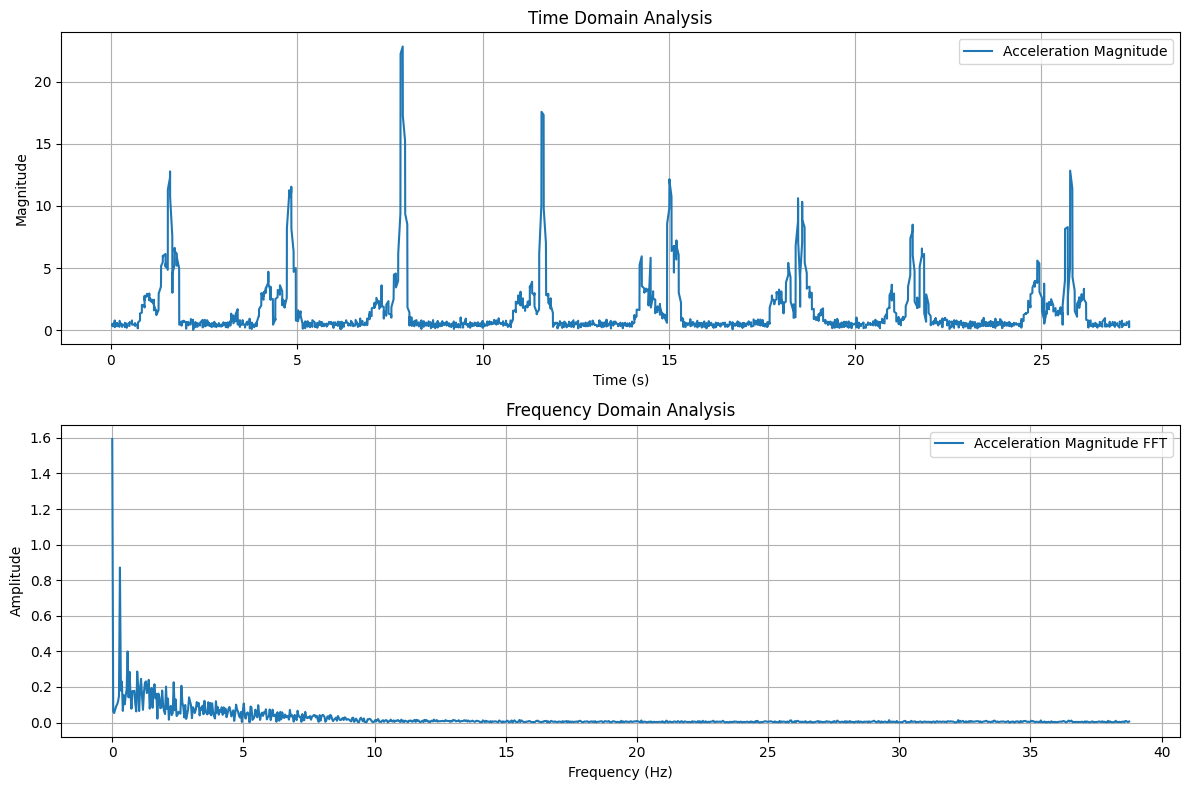

In [10]:
df = pd.read_csv('StandUp.csv')

# Calculate magnitude of acceleration and gyroscope
df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
df['Gyr_Magnitude'] = np.sqrt(df['GyrX']**2 + df['GyrY']**2 + df['GyrZ']**2)


# Plot in time domain
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Acc_Magnitude'], label='Acceleration Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Time Domain Analysis')
plt.legend()
plt.grid()

# Frequency domain analysis for acceleration
N = len(df)
T = (df['Time'].iloc[-1] - df['Time'].iloc[0]) / N  # Sampling interval
freq = fftfreq(N, T)[:N//2]
acc_fft = fft(df['Acc_Magnitude'].values)[:N//2]
acc_fft = np.abs(acc_fft) / N

plt.subplot(2, 1, 2)
plt.plot(freq, acc_fft, label='Acceleration Magnitude FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Preprocessing phase

In [11]:
## Checking dataset structure
# Define datasets
datasets = {
    'Chair without sitting': 'Chair without sitting.csv',
    'Sit': 'Sit.csv',
    'StandUp': 'StandUp.csv',
    'Nervous tic': 'Nervous tic.csv'
}

# Check structure of each dataset
for class_name, file in datasets.items():
    df = pd.read_csv(file)
    print(f"Dataset: {class_name}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Number of samples: {len(df)}")
    print(f"Time range: {df['Time'].min():.2f} to {df['Time'].max():.2f} seconds")
    print(f"Approximate sampling rate (Hz): {(len(df) / (df['Time'].max() - df['Time'].min())):.2f}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print("-" * 50)

Dataset: Chair without sitting
Columns: ['Time', 'AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'MagX', 'MagY', 'MagZ']
Number of samples: 14564
Time range: 0.01 to 189.26 seconds
Approximate sampling rate (Hz): 76.96
Missing values: 0
--------------------------------------------------
Dataset: Sit
Columns: ['Time', 'AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'MagX', 'MagY', 'MagZ']
Number of samples: 3129
Time range: 0.03 to 40.41 seconds
Approximate sampling rate (Hz): 77.50
Missing values: 0
--------------------------------------------------
Dataset: StandUp
Columns: ['Time', 'AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'MagX', 'MagY', 'MagZ']
Number of samples: 2120
Time range: 0.03 to 27.36 seconds
Approximate sampling rate (Hz): 77.60
Missing values: 0
--------------------------------------------------
Dataset: Nervous tic
Columns: ['Time', 'AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'MagX', 'MagY', 'MagZ']
Number of samples: 15161
Time range: 0.03 to 257.48 seconds
A

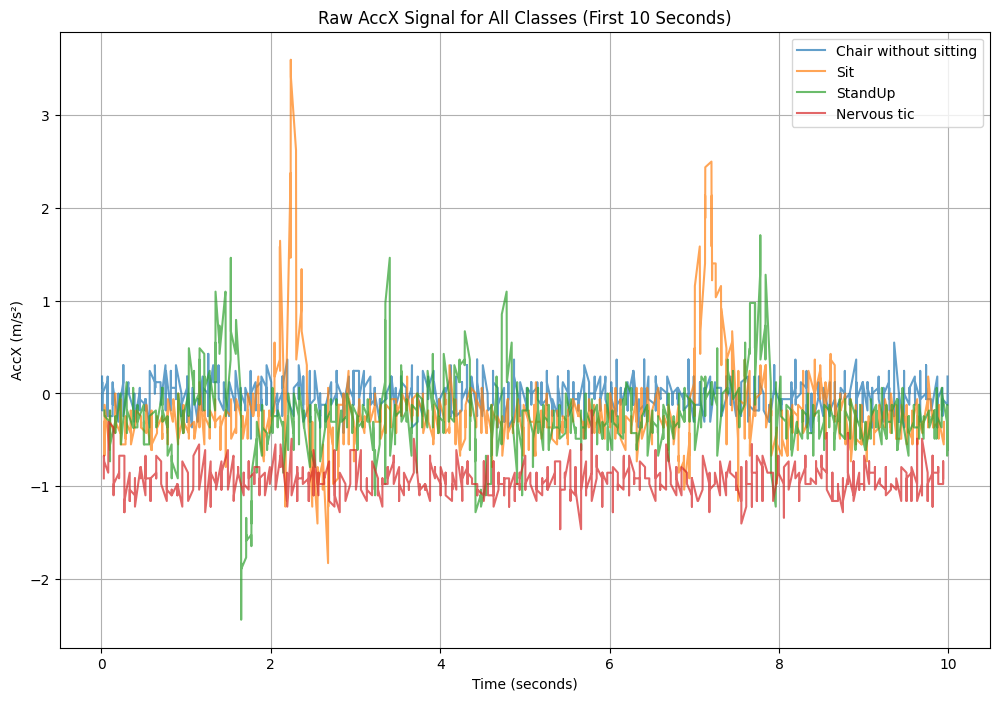

In [12]:
# Plot raw AccX for each dataset (first 10 seconds)
plt.figure(figsize=(12, 8))
for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz)
    df = df[df['Time'] <= 10]
    plt.plot(df['Time'], df['AccX'], label=class_name, alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('AccX (m/s²)')
plt.title('Raw AccX Signal for All Classes (First 10 Seconds)')
plt.legend()
plt.grid()
plt.show()

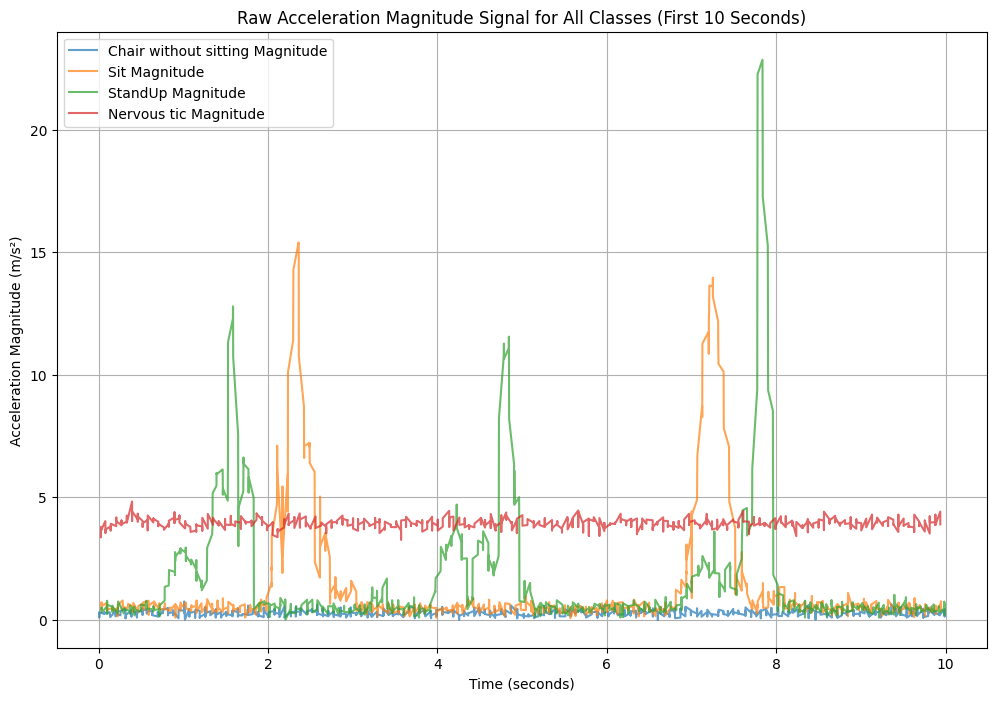

In [13]:
# Plot raw AccX and magnitude for each dataset (first 10 seconds)
plt.figure(figsize=(12, 8))
for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz)
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    plt.plot(df['Time'], df['Acc_Magnitude'], label=f'{class_name} Magnitude', alpha=0.7)

plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Magnitude (m/s²)')
plt.title('Raw Acceleration Magnitude Signal for All Classes (First 10 Seconds)')
plt.legend()
plt.grid()
plt.show()

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

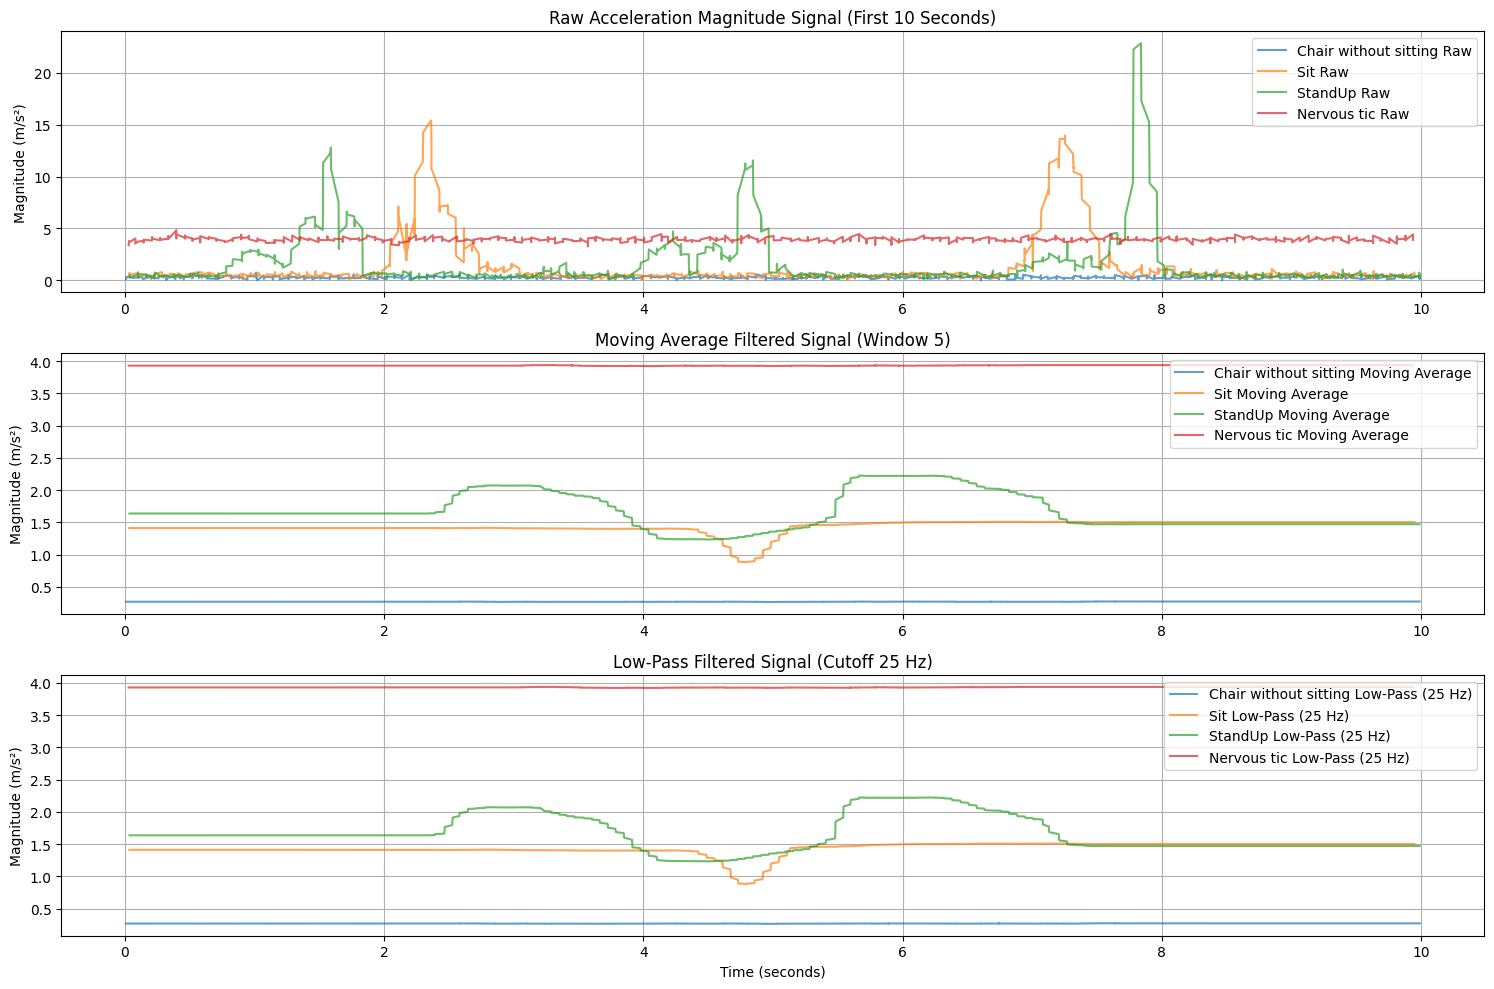

In [14]:
# Plot raw, Moving Average, and Low-Pass filtered signals
plt.figure(figsize=(15, 10))

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz)
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Raw signal
    plt.subplot(3, 1, 1)
    plt.plot(df['Time'], df['Acc_Magnitude'], label=f'{class_name} Raw', alpha=0.7)
    
    # Apply Moving Average filter
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    plt.subplot(3, 1, 2)
    plt.plot(df['Time'], df['Acc_Magnitude_MA'], label=f'{class_name} Moving Average', alpha=0.7)
    
    # Apply Low-Pass filter
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    plt.subplot(3, 1, 3)
    plt.plot(df['Time'], df['Acc_Magnitude_LP'], label=f'{class_name} Low-Pass (25 Hz)', alpha=0.7)

# Adjust subplots
plt.subplot(3, 1, 1)
plt.title('Raw Acceleration Magnitude Signal (First 10 Seconds)')
plt.ylabel('Magnitude (m/s²)')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.title('Moving Average Filtered Signal (Window 5)')
plt.ylabel('Magnitude (m/s²)')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.title('Low-Pass Filtered Signal (Cutoff 25 Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude (m/s²)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


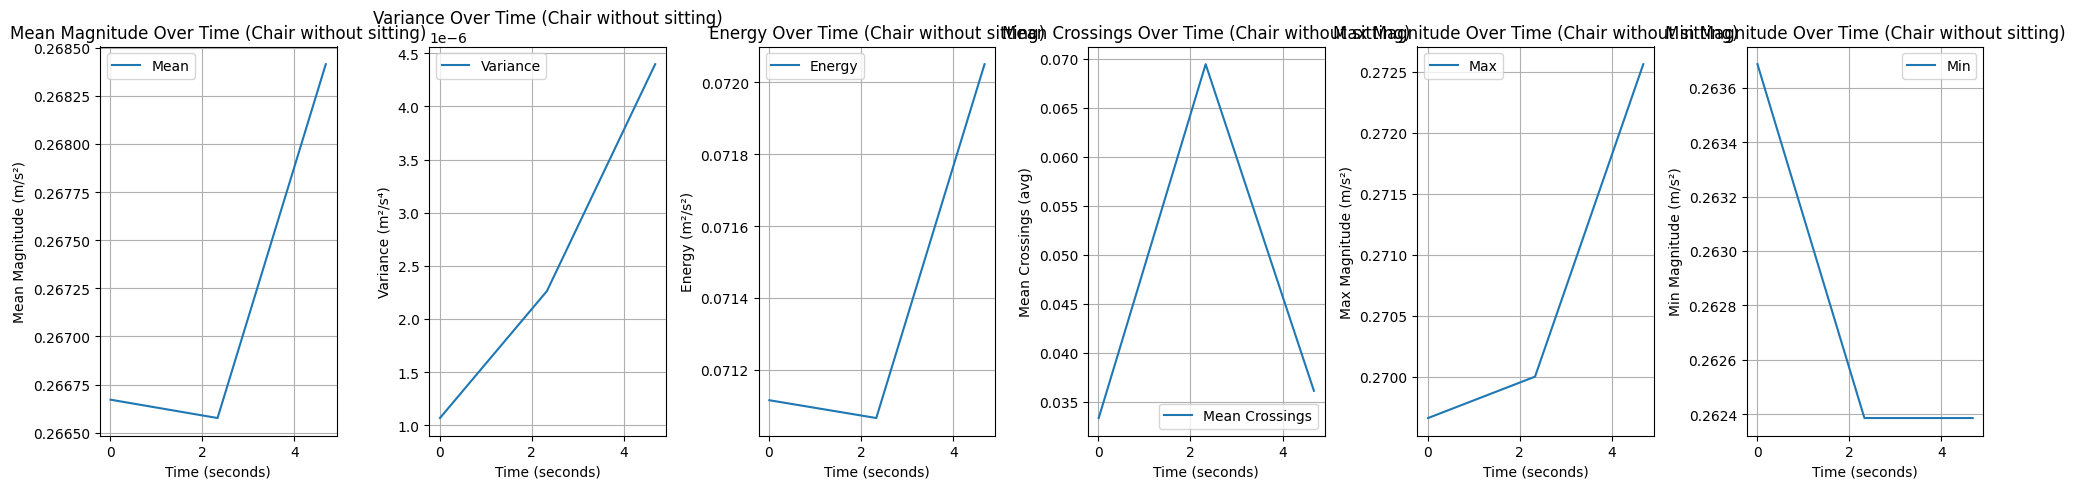

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


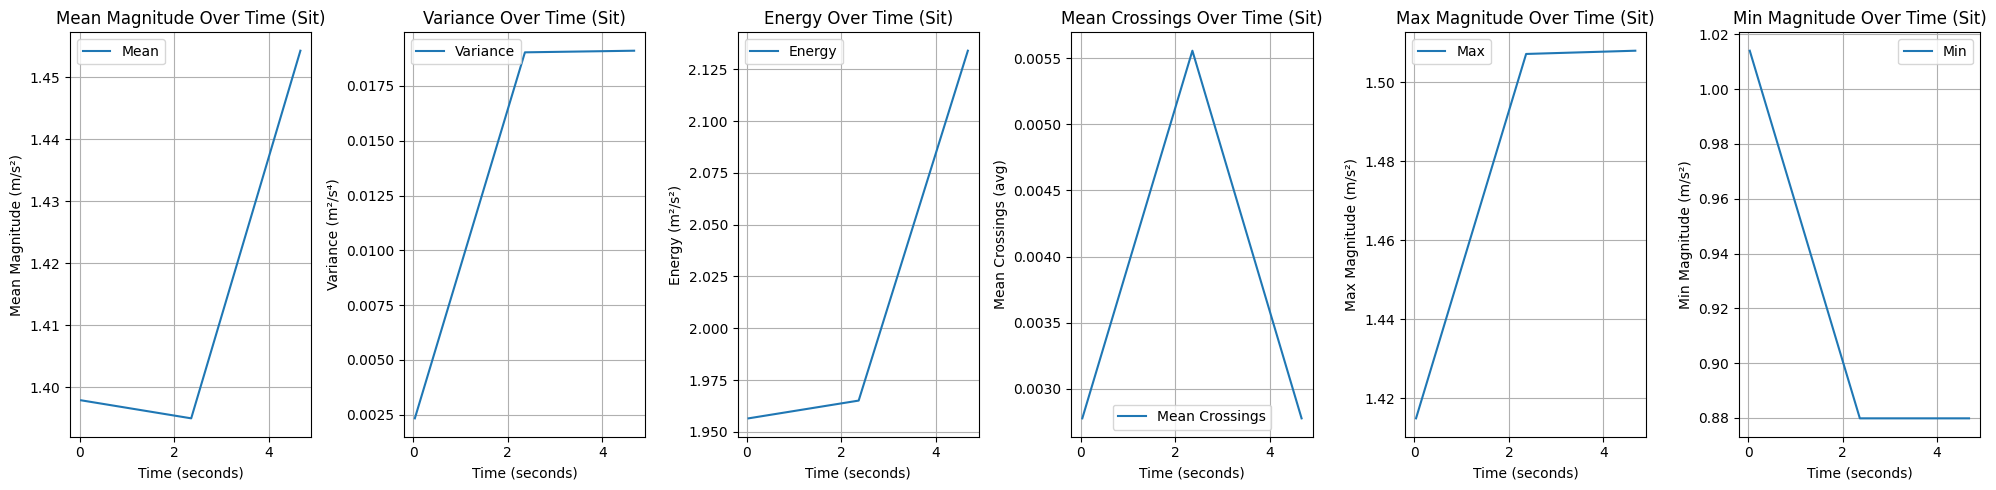

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


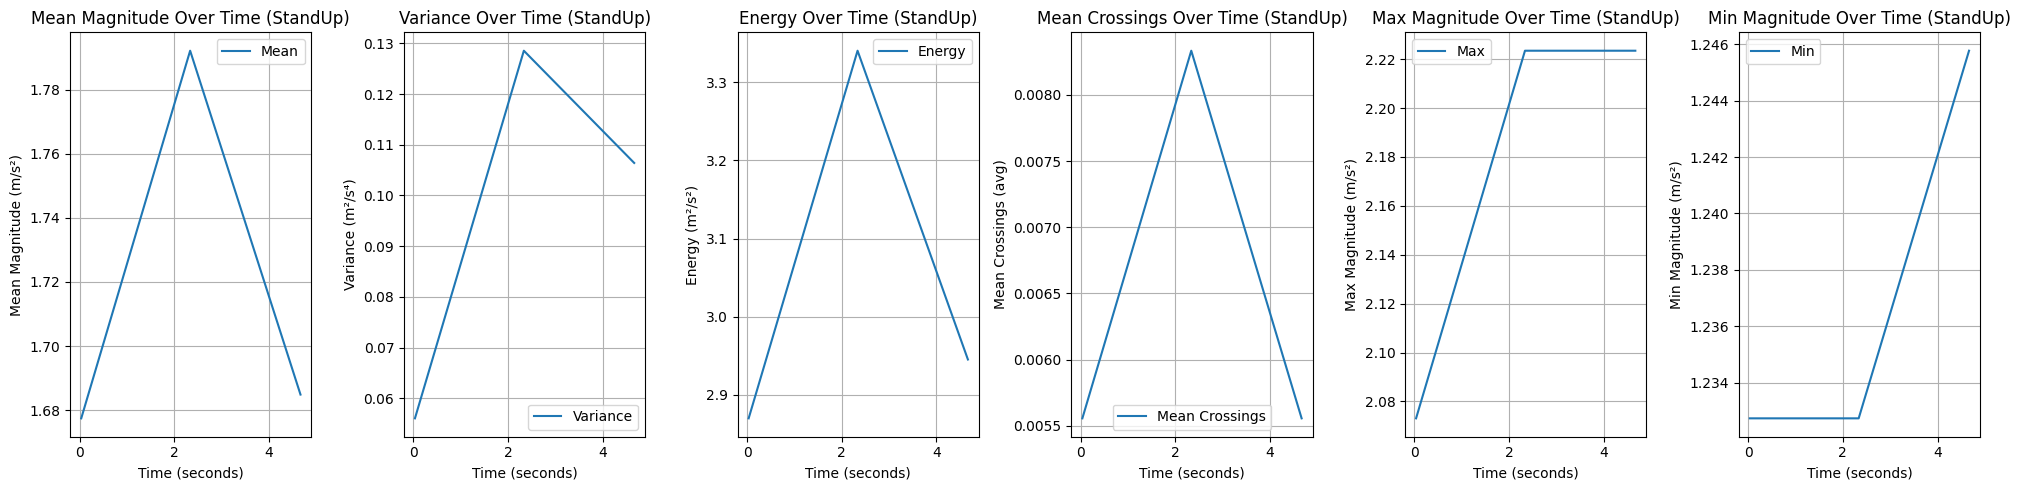

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


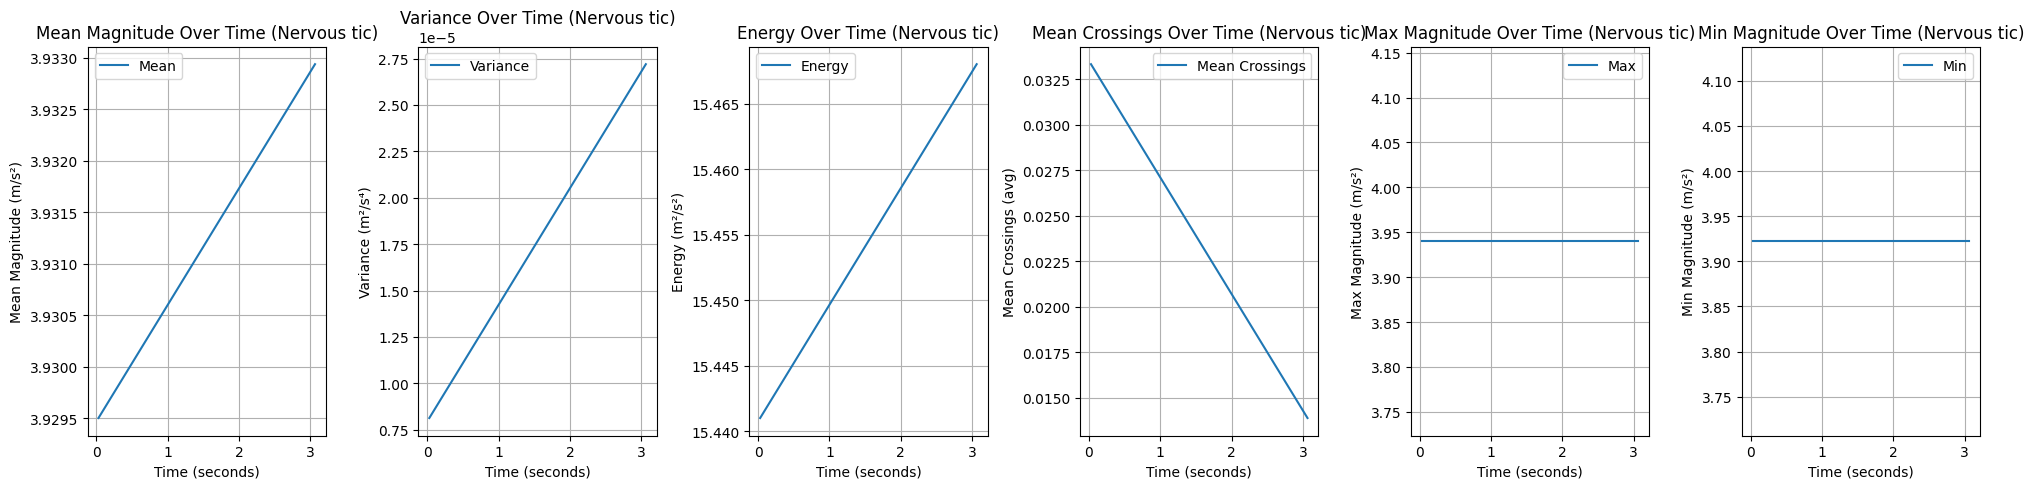

In [15]:
# Extract time-domain features
features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz)
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

    # Plot features for each class in separate figures
    time_points = df['Time'].iloc[range(0, len(df) - window_size + 1, step_size)]
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 6, 1)
    plt.plot(time_points, features[class_name]['Mean'], label='Mean')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mean Magnitude (m/s²)')
    plt.title(f'Mean Magnitude Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 6, 2)
    plt.plot(time_points, features[class_name]['Variance'], label='Variance')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Variance (m²/s⁴)')
    plt.title(f'Variance Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 6, 3)
    plt.plot(time_points, features[class_name]['Energy'], label='Energy')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Energy (m²/s²)')
    plt.title(f'Energy Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 6, 4)
    plt.plot(time_points, features[class_name]['Mean_Crossings'], label='Mean Crossings')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mean Crossings (avg)')
    plt.title(f'Mean Crossings Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 6, 5)
    plt.plot(time_points, features[class_name]['Max'], label='Max')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Max Magnitude (m/s²)')
    plt.title(f'Max Magnitude Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 6, 6)
    plt.plot(time_points, features[class_name]['Min'], label='Min')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Min Magnitude (m/s²)')
    plt.title(f'Min Magnitude Over Time ({class_name})')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

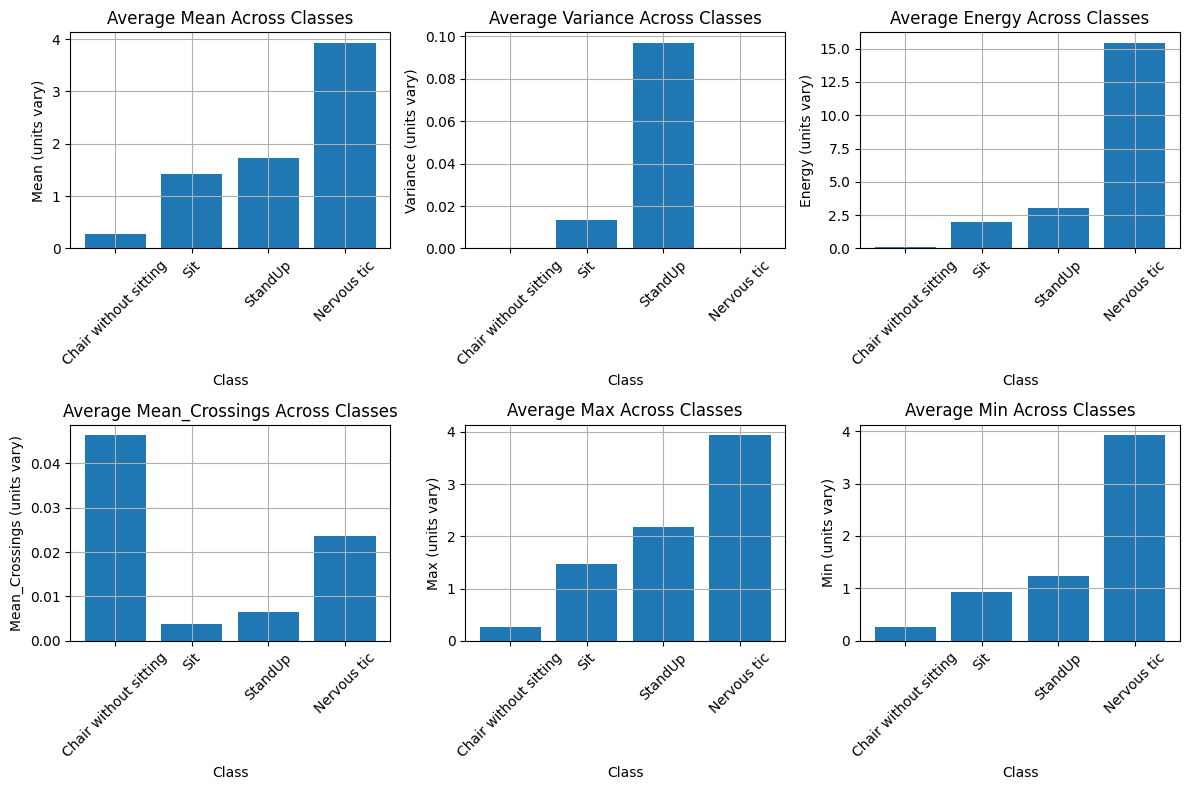

In [16]:
features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz)
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Calculate average of features for each class
feature_averages = {class_name: {feature: np.mean(values) for feature, values in feature_dict.items()} for class_name, feature_dict in features.items()}

# Plot average features for comparison
plt.figure(figsize=(12, 8))

for idx, feature in enumerate(['Mean', 'Variance', 'Energy', 'Mean_Crossings', 'Max', 'Min'], 1):
    plt.subplot(2, 3, idx)
    values = [feature_averages[class_name][feature] for class_name in datasets]
    plt.bar(list(datasets.keys()), values)
    plt.xlabel('Class')
    plt.ylabel(feature + ' (units vary)')
    plt.title(f'Average {feature} Across Classes')
    plt.xticks(rotation=45)
    plt.grid()

plt.tight_layout()
plt.show()

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\219024714.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=list(datasets.keys()))
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\219024714.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=list(datasets.keys()))
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\219024714.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=list(datasets.keys()))
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\219024714.py:7: MatplotlibDeprecati

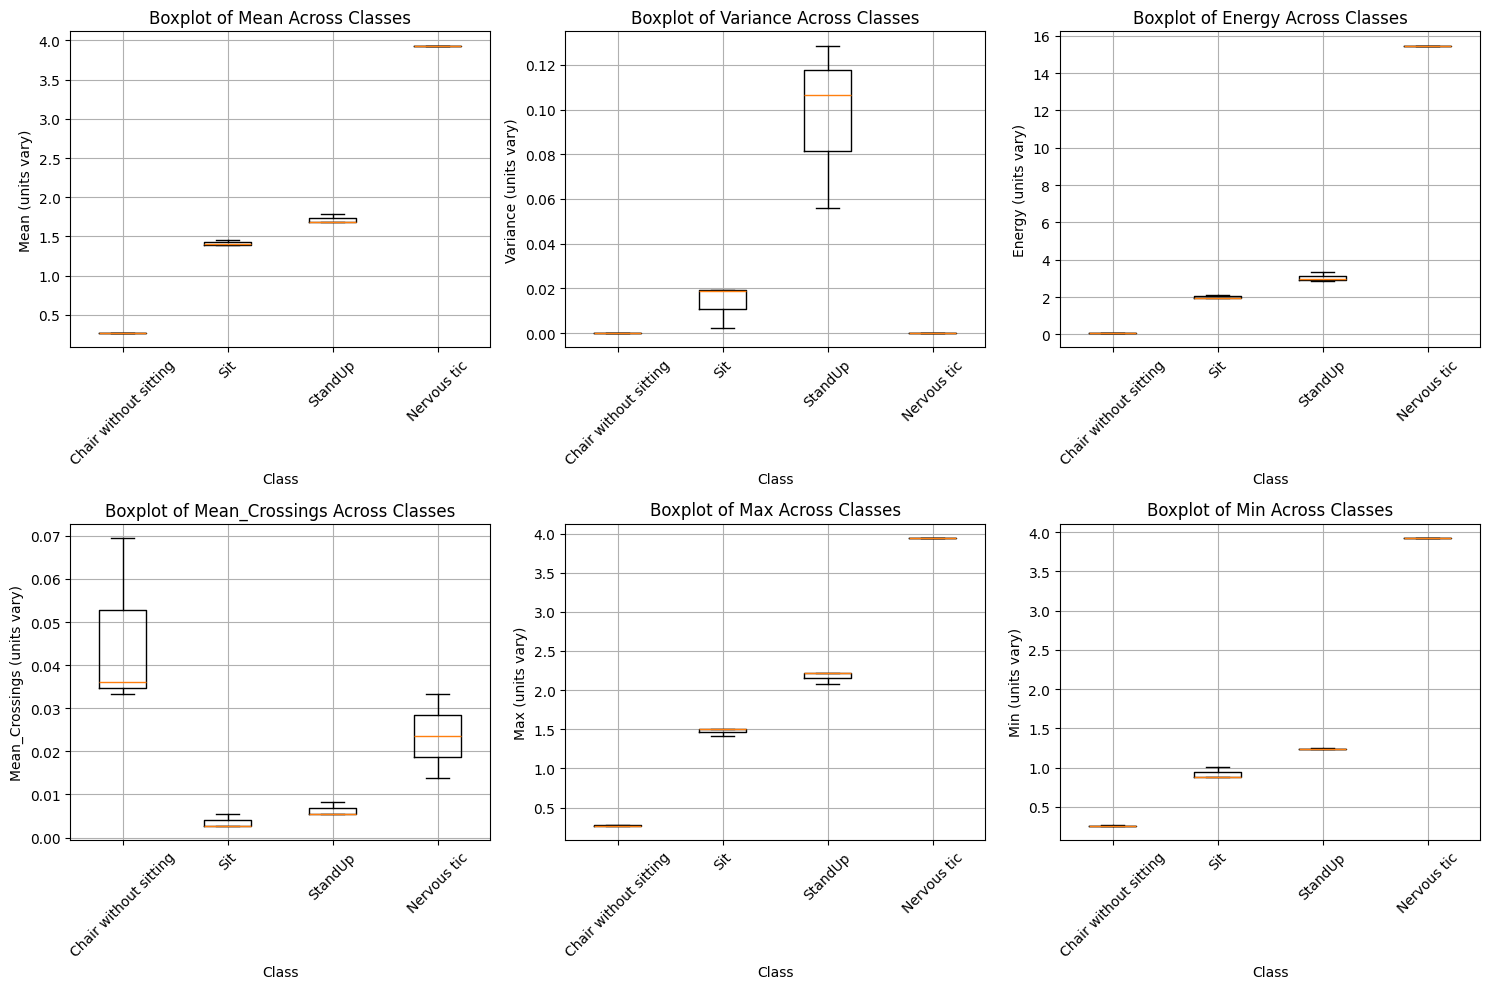

In [17]:
# Plot boxplots for feature distributions across classes
plt.figure(figsize=(15, 10))

for idx, feature in enumerate(['Mean', 'Variance', 'Energy', 'Mean_Crossings', 'Max', 'Min'], 1):
    plt.subplot(2, 3, idx)
    data_for_box = [features[class_name][feature] for class_name in datasets]
    plt.boxplot(data_for_box, labels=list(datasets.keys()))
    plt.xlabel('Class')
    plt.ylabel(f'{feature} (units vary)')
    plt.title(f'Boxplot of {feature} Across Classes')
    plt.xticks(rotation=45)
    plt.grid()

plt.tight_layout()
plt.show()

## Finding Thresholds for Nervous tic Class

In [18]:
# Define datasets
datasets = {
    'Chair_without_sitting': 'Chair without sitting.csv',
    'Sit': 'Sit.csv',
    'StandUp': 'StandUp.csv',
    'Nervous_tic': 'Nervous tic.csv'
}

features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz) for threshold calculation
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Determine and print thresholds based on median of each feature (from 10 seconds)
thresholds = {feature: {class_name: np.median(features[class_name][feature]) for class_name in datasets} for feature in ['Mean', 'Energy', 'Max', 'Min']}
print("Thresholds (medians) for each feature and class (based on 10 seconds):")
for feature in thresholds:
    print(f"\n{feature}:")
    for class_name, threshold in thresholds[feature].items():
        print(f"  {class_name}: {threshold:.4f}")
print()

# Function to classify a window based on a single feature and threshold
def classify_window(feature_value, feature_name, class_name):
    class_thresholds = thresholds[feature_name]
    # Simple classification: assign to class with closest median
    min_diff = float('inf')
    predicted_class = None
    for c_name in datasets:
        diff = abs(feature_value - class_thresholds[c_name])
        if diff < min_diff:
            min_diff = diff
            predicted_class = c_name
    return predicted_class

# Test classification on a sample window (e.g., from Nervous_tic) using 40 seconds
test_class = 'Nervous_tic'
test_df = pd.read_csv(datasets[test_class])
test_df = test_df[test_df['Time'] <= 40]  # Use 40 seconds for testing
test_df['Acc_Magnitude'] = np.sqrt(test_df['AccX']**2 + test_df['AccY']**2 + test_df['AccZ']**2)
test_df['Acc_Magnitude_MA'] = apply_moving_average(test_df['Acc_Magnitude'])
test_df['Acc_Magnitude_LP'] = apply_low_pass_filter(test_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []}
for i in range(0, len(test_df) - window_size + 1, step_size):
    window = test_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Variance'].append(np.var(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    test_features['Mean_Crossings'].append(count_mean_crossings(window))
    test_features['Max'].append(np.max(window))
    test_features['Min'].append(np.min(window))

# Classify first 20 windows for selected features
num_windows = min(20, len(test_features['Max']))  # Ensure we don't exceed available windows
selected_features = ['Energy', 'Mean', 'Max', 'Min']  # Replaced Variance with Energy
predictions = {}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature, test_class) for value in test_features[feature][:num_windows]]

# Print classification results for the first 20 windows
for feature in predictions:
    print(f"Classification using {feature} (first {num_windows} windows for {test_class}):")
    print(predictions[feature])
    print()

Thresholds (medians) for each feature and class (based on 10 seconds):

Mean:
  Chair_without_sitting: 0.2667
  Sit: 1.3979
  StandUp: 1.6849
  Nervous_tic: 3.9312

Energy:
  Chair_without_sitting: 0.0711
  Sit: 1.9651
  StandUp: 2.9452
  Nervous_tic: 15.4545

Max:
  Chair_without_sitting: 0.2700
  Sit: 1.5071
  StandUp: 2.2234
  Nervous_tic: 3.9401

Min:
  Chair_without_sitting: 0.2624
  Sit: 0.8799
  StandUp: 1.2327
  Nervous_tic: 3.9224

Classification using Energy (first 12 windows for Nervous_tic):
['Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic']

Classification using Mean (first 12 windows for Nervous_tic):
['Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic', 'Nervous_tic']

Classification using Max (first 12 windows for Nervous_tic):
['Ne

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

## Finding Thresholds for Without Sitting Class

In [19]:
features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz) for threshold calculation
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Function to classify a window based on a single feature and threshold
def classify_window(feature_value, feature_name, class_name):
    class_thresholds = thresholds[feature_name]
    # Simple classification: assign to class with closest median
    min_diff = float('inf')
    predicted_class = None
    for c_name in datasets:
        diff = abs(feature_value - class_thresholds[c_name])
        if diff < min_diff:
            min_diff = diff
            predicted_class = c_name
    return predicted_class

# Test classification on a sample window (e.g., from Chair_without_sitting) using 40 seconds
test_class = 'Chair_without_sitting'
test_df = pd.read_csv(datasets[test_class])
test_df = test_df[test_df['Time'] <= 40]  # Use 40 seconds for testing
test_df['Acc_Magnitude'] = np.sqrt(test_df['AccX']**2 + test_df['AccY']**2 + test_df['AccZ']**2)
test_df['Acc_Magnitude_MA'] = apply_moving_average(test_df['Acc_Magnitude'])
test_df['Acc_Magnitude_LP'] = apply_low_pass_filter(test_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []}
for i in range(0, len(test_df) - window_size + 1, step_size):
    window = test_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Variance'].append(np.var(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    test_features['Mean_Crossings'].append(count_mean_crossings(window))
    test_features['Max'].append(np.max(window))
    test_features['Min'].append(np.min(window))

# Classify first 20 windows for selected features
num_windows = min(20, len(test_features['Max']))  # Ensure we don't exceed available windows
selected_features = ['Mean', 'Energy', 'Max', 'Min']  # Only these four features
predictions = {}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature, test_class) for value in test_features[feature][:num_windows]]

# Print classification results for the first 20 windows
for feature in predictions:
    print(f"Classification using {feature} (first {num_windows} windows for {test_class}):")
    print(predictions[feature])
    print()

Classification using Mean (first 16 windows for Chair_without_sitting):
['Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting']

Classification using Energy (first 16 windows for Chair_without_sitting):
['Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting', 'Chair_without_sitting']

Classification using Max (first 16 windows for Cha

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

## Finding Thresholds for StandUp Class

In [20]:
features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz) for threshold calculation
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Test classification on a sample window (e.g., from StandUp) using 40 seconds
test_class = 'StandUp'
test_df = pd.read_csv(datasets[test_class])
test_df = test_df[test_df['Time'] <= 40]  # Use 40 seconds for testing
test_df['Acc_Magnitude'] = np.sqrt(test_df['AccX']**2 + test_df['AccY']**2 + test_df['AccZ']**2)
test_df['Acc_Magnitude_MA'] = apply_moving_average(test_df['Acc_Magnitude'])
test_df['Acc_Magnitude_LP'] = apply_low_pass_filter(test_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []}
for i in range(0, len(test_df) - window_size + 1, step_size):
    window = test_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Variance'].append(np.var(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    test_features['Mean_Crossings'].append(count_mean_crossings(window))
    test_features['Max'].append(np.max(window))
    test_features['Min'].append(np.min(window))

# Classify first 20 windows for selected features
num_windows = min(20, len(test_features['Max']))  # Ensure we don't exceed available windows
selected_features = ['Mean', 'Min', 'Max', 'Energy']  # These four features
predictions = {}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature, test_class) for value in test_features[feature][:num_windows]]

# Print classification results for the first 20 windows
for feature in predictions:
    print(f"Classification using {feature} (first {num_windows} windows for {test_class}):")
    print(predictions[feature])
    print()

Classification using Mean (first 10 windows for StandUp):
['StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'StandUp', 'Sit', 'Sit']

Classification using Min (first 10 windows for StandUp):
['StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'Sit']

Classification using Max (first 10 windows for StandUp):
['StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit']

Classification using Energy (first 10 windows for StandUp):
['StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'StandUp', 'Sit', 'Sit']



C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

## Finding Thresholds for Sit Class

In [21]:
features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Limit to first 10 seconds (720 samples at 72 Hz) for threshold calculation
    df = df[df['Time'] <= 10]
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Function to classify a window based on a single feature and threshold
def classify_window(feature_value, feature_name, class_name):
    class_thresholds = thresholds[feature_name]
    # Simple classification: assign to class with closest median
    min_diff = float('inf')
    predicted_class = None
    for c_name in datasets:
        diff = abs(feature_value - class_thresholds[c_name])
        if diff < min_diff:
            min_diff = diff
            predicted_class = c_name
    return predicted_class

# Test classification on a sample window (e.g., from StandUp) using 40 seconds
test_class = 'Sit'
test_df = pd.read_csv(datasets[test_class])
test_df = test_df[test_df['Time'] <= 40]  # Use 40 seconds for testing
test_df['Acc_Magnitude'] = np.sqrt(test_df['AccX']**2 + test_df['AccY']**2 + test_df['AccZ']**2)
test_df['Acc_Magnitude_MA'] = apply_moving_average(test_df['Acc_Magnitude'])
test_df['Acc_Magnitude_LP'] = apply_low_pass_filter(test_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []}
for i in range(0, len(test_df) - window_size + 1, step_size):
    window = test_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Variance'].append(np.var(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    test_features['Mean_Crossings'].append(count_mean_crossings(window))
    test_features['Max'].append(np.max(window))
    test_features['Min'].append(np.min(window))

# Classify first 20 windows for selected features
num_windows = min(20, len(test_features['Max']))  # Ensure we don't exceed available windows
selected_features = ['Mean', 'Min', 'Max', 'Energy']  # These four features
predictions = {}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature, test_class) for value in test_features[feature][:num_windows]]

# Print classification results for the first 20 windows
for feature in predictions:
    print(f"Classification using {feature} (first {num_windows} windows for {test_class}):")
    print(predictions[feature])
    print()

Classification using Mean (first 16 windows for Sit):
['Sit', 'Sit', 'Sit', 'Sit', 'Sit', 'Sit', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'Sit', 'StandUp']

Classification using Min (first 16 windows for Sit):
['Sit', 'Sit', 'Sit', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp']

Classification using Max (first 16 windows for Sit):
['Sit', 'Sit', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'Sit', 'StandUp']

Classification using Energy (first 16 windows for Sit):
['Sit', 'Sit', 'Sit', 'Sit', 'Sit', 'Sit', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'StandUp', 'Sit', 'Sit', 'StandUp']



C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel

## Evaluating More Accurately & Merging the StandUp class with the Sit class

In [22]:
# Define datasets with updated labels
datasets = {
    'Chair_without_sitting': 'Chair without sitting.csv',
    'SitStand': 'Sit.csv',  # Merged Sit and StandUp into SitStand
    'SitStand': 'StandUp.csv',
    'Nervous_tic': 'Nervous tic.csv'
}

features = {class_name: {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []} for class_name in datasets}

for class_name, file in datasets.items():
    df = pd.read_csv(file)
    # Use full range of the dataset
    # Calculate magnitude of acceleration
    df['Acc_Magnitude'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)
    
    # Apply filters
    df['Acc_Magnitude_MA'] = apply_moving_average(df['Acc_Magnitude'])
    df['Acc_Magnitude_LP'] = apply_low_pass_filter(df['Acc_Magnitude_MA'])
    
    # Extract features in sliding windows over full range
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        features[class_name]['Mean'].append(np.mean(window))
        features[class_name]['Variance'].append(np.var(window))
        features[class_name]['Energy'].append(np.sum(window**2) / len(window))  # Normalized energy
        features[class_name]['Mean_Crossings'].append(count_mean_crossings(window))
        features[class_name]['Max'].append(np.max(window))
        features[class_name]['Min'].append(np.min(window))

# Determine and print thresholds based on mean of features over full range
thresholds = {feature: {class_name: np.mean(features[class_name][feature]) for class_name in datasets} for feature in ['Mean', 'Min', 'Max', 'Energy']}
print("Thresholds (means) for each feature and class (based on full range windows):")
for feature in thresholds:
    print(f"\n{feature}:")
    for class_name, threshold in thresholds[feature].items():
        print(f"  {class_name}: {threshold:.4f}")
print()

# Test classification on a sample window (e.g., from SitStand) using full range
test_class = 'SitStand'
test_df = pd.read_csv(datasets[test_class])  # Using Sit.csv as first SitStand example
test_df['Acc_Magnitude'] = np.sqrt(test_df['AccX']**2 + test_df['AccY']**2 + test_df['AccZ']**2)
test_df['Acc_Magnitude_MA'] = apply_moving_average(test_df['Acc_Magnitude'])
test_df['Acc_Magnitude_LP'] = apply_low_pass_filter(test_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Variance': [], 'Energy': [], 'Mean_Crossings': [], 'Max': [], 'Min': []}
for i in range(0, len(test_df) - window_size + 1, step_size):
    window = test_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Variance'].append(np.var(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    test_features['Mean_Crossings'].append(count_mean_crossings(window))
    test_features['Max'].append(np.max(window))
    test_features['Min'].append(np.min(window))


C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


Thresholds (means) for each feature and class (based on full range windows):

Mean:
  Chair_without_sitting: 0.2665
  SitStand: 1.5943
  Nervous_tic: 3.9415

Min:
  Chair_without_sitting: 0.2602
  SitStand: 1.2214
  Nervous_tic: 3.9002

Max:
  Chair_without_sitting: 0.2725
  SitStand: 2.0947
  Nervous_tic: 3.9831

Energy:
  Chair_without_sitting: 0.0710
  SitStand: 2.6450
  Nervous_tic: 15.5384



C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\430765781.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\954188390.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


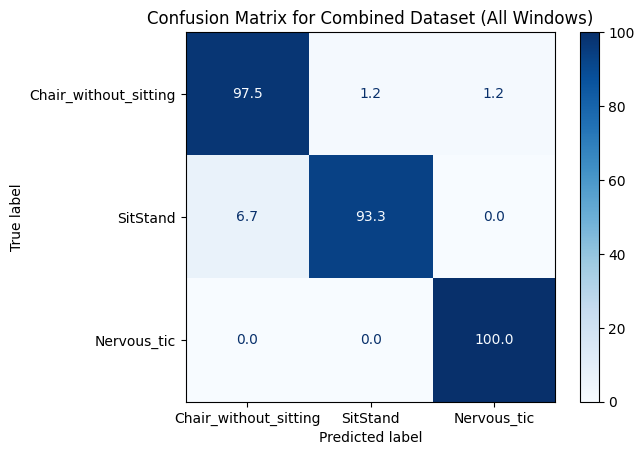

In [23]:
# Define input dataset files
dataset_files = {
    'SitStand': ['Sit.csv', 'StandUp.csv'],
    'Chair_without_sitting': ['Chair without sitting.csv'],
    'Nervous_tic': ['Nervous tic.csv']
}

# Combine datasets and add label column
combined_dfs = []
for label, files in dataset_files.items():
    for file in files:
        df = pd.read_csv(file)
        df['label'] = label  # Add label column
        combined_dfs.append(df)

combined_df = pd.concat(combined_dfs, ignore_index=True)
combined_df.to_csv('combined_dataset.csv', index=False)  # Save combined dataset

# Predefined thresholds based on provided values
thresholds = {
    'Mean': {'Chair_without_sitting': 0.2665, 'SitStand': 1.5950, 'Nervous_tic': 3.9417},
    'Min': {'Chair_without_sitting': 0.2239, 'SitStand': 1.1800, 'Nervous_tic': 3.7602},
    'Max': {'Chair_without_sitting': 0.3098, 'SitStand': 2.0300, 'Nervous_tic': 4.1234},
    'Energy': {'Chair_without_sitting': 0.0736, 'SitStand': 8.1120, 'Nervous_tic': 15.6236}
}

# Function to apply Moving Average filter
def apply_moving_average(data, window_size=360):
    return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Function to apply Low-Pass filter
def apply_low_pass_filter(data, cutoff_freq=25, fs=72, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Function to classify a window based on a single feature and threshold
def classify_window(feature_value, feature_name):
    class_thresholds = thresholds[feature_name]
    min_diff = float('inf')
    predicted_class = None
    for c_name in class_thresholds:
        diff = abs(feature_value - class_thresholds[c_name])
        if diff < min_diff:
            min_diff = diff
            predicted_class = c_name
    return predicted_class

# Calculate magnitude of acceleration
combined_df['Acc_Magnitude'] = np.sqrt(combined_df['AccX']**2 + combined_df['AccY']**2 + combined_df['AccZ']**2)

# Apply filters
combined_df['Acc_Magnitude_MA'] = apply_moving_average(combined_df['Acc_Magnitude'])
combined_df['Acc_Magnitude_LP'] = apply_low_pass_filter(combined_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Min': [], 'Max': [], 'Energy': []}
true_labels = []
for i in range(0, len(combined_df) - window_size + 1, step_size):
    window = combined_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Min'].append(np.min(window))
    test_features['Max'].append(np.max(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    true_labels.append(combined_df['label'].iloc[i])  # Use label column

# Classify all windows with voting
num_windows = len(test_features['Mean'])  # Use all windows
selected_features = ['Mean', 'Min', 'Max', 'Energy']
predictions = {feature: [] for feature in selected_features}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature) for value in test_features[feature]]

# Voting mechanism for final label
final_predictions = []
for i in range(num_windows):
    votes = {c_name: 0 for c_name in thresholds['Mean']}
    for feature in selected_features:
        pred = predictions[feature][i]
        votes[pred] += 1
    final_pred = max(votes.items(), key=lambda x: x[1])[0]  # Majority vote
    final_predictions.append(final_pred)

# Compute and display confusion matrix with percentages
cm = confusion_matrix(true_labels, final_predictions, labels=list(thresholds['Mean'].keys()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize to percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=list(thresholds['Mean'].keys()))
disp.plot(cmap='Blues', values_format='.1f')  # Display percentages with 1 decimal
plt.title('Confusion Matrix for Combined Dataset (All Windows)')
plt.show()

## Reproducing the thresholds and plotting the confusion matrix 

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\954188390.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_28504\954188390.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return data.rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')


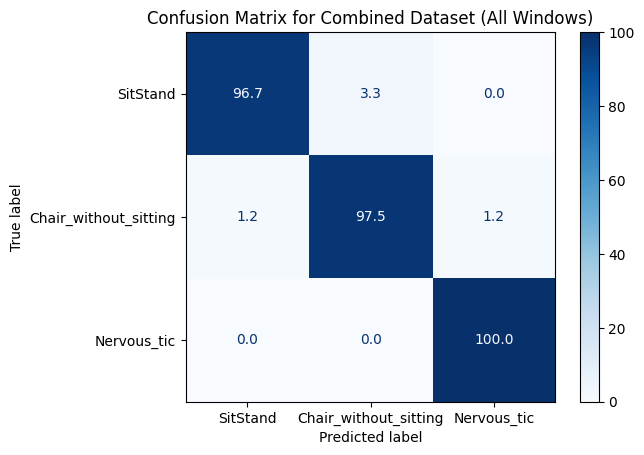


Thresholds (Mean Values for Each Feature and Label):
  Mean_SitStand: 1.5935
  Mean_Chair_without_sitting: 0.2680
  Mean_Nervous_tic: 3.9359
  Min_SitStand: 1.2373
  Min_Chair_without_sitting: 0.2602
  Min_Nervous_tic: 3.8783
  Max_SitStand: 2.1326
  Max_Chair_without_sitting: 0.2837
  Max_Nervous_tic: 3.9831
  Energy_SitStand: 2.6643
  Energy_Chair_without_sitting: 0.0726
  Energy_Nervous_tic: 15.5017


In [24]:
# Combine datasets and add label column
combined_dfs = []
for label, files in dataset_files.items():
    for file in files:
        df = pd.read_csv(file)
        df['label'] = label  # Add label column
        combined_dfs.append(df)

combined_df = pd.concat(combined_dfs, ignore_index=True)
combined_df.to_csv('combined_dataset.csv', index=False)  # Save combined dataset

# Calculate magnitude of acceleration for threshold computation
combined_df['Acc_Magnitude'] = np.sqrt(combined_df['AccX']**2 + combined_df['AccY']**2 + combined_df['AccZ']**2)
combined_df['Acc_Magnitude_MA'] = apply_moving_average(combined_df['Acc_Magnitude'])
combined_df['Acc_Magnitude_LP'] = apply_low_pass_filter(combined_df['Acc_Magnitude_MA'])

features_by_label = {'Mean': {}, 'Min': {}, 'Max': {}, 'Energy': {}}
for label in dataset_files.keys():
    label_df = combined_df[combined_df['label'] == label]
    test_features = {'Mean': [], 'Min': [], 'Max': [], 'Energy': []}
    for i in range(0, len(label_df) - window_size + 1, step_size):
        window = label_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
        test_features['Mean'].append(np.mean(window))
        test_features['Min'].append(np.min(window))
        test_features['Max'].append(np.max(window))
        test_features['Energy'].append(np.sum(window**2) / len(window))
    for feature in test_features:
        features_by_label[feature][label] = np.mean(test_features[feature])

# Process the combined dataset for all windows
# Calculate magnitude of acceleration
combined_df['Acc_Magnitude'] = np.sqrt(combined_df['AccX']**2 + combined_df['AccY']**2 + combined_df['AccZ']**2)
combined_df['Acc_Magnitude_MA'] = apply_moving_average(combined_df['Acc_Magnitude'])
combined_df['Acc_Magnitude_LP'] = apply_low_pass_filter(combined_df['Acc_Magnitude_MA'])

test_features = {'Mean': [], 'Min': [], 'Max': [], 'Energy': []}
true_labels = []
for i in range(0, len(combined_df) - window_size + 1, step_size):
    window = combined_df['Acc_Magnitude_LP'].iloc[i:i + window_size]
    test_features['Mean'].append(np.mean(window))
    test_features['Min'].append(np.min(window))
    test_features['Max'].append(np.max(window))
    test_features['Energy'].append(np.sum(window**2) / len(window))
    true_labels.append(combined_df['label'].iloc[i])  # Use label column

# Classify all windows with voting based on proximity to mean thresholds
num_windows = len(test_features['Mean'])  # Use all windows
selected_features = ['Mean', 'Min', 'Max', 'Energy']
predictions = {feature: [] for feature in selected_features}
for feature in selected_features:
    predictions[feature] = [classify_window(value, feature) for value in test_features[feature]]

# Voting mechanism for final label
final_predictions = []
for i in range(num_windows):
    votes = {c_name: 0 for c_name in features_by_label['Mean']}
    for feature in selected_features:
        pred = predictions[feature][i]
        votes[pred] += 1
    final_pred = max(votes.items(), key=lambda x: x[1])[0]  # Majority vote
    final_predictions.append(final_pred)

# Compute and display confusion matrix with percentages
cm = confusion_matrix(true_labels, final_predictions, labels=list(features_by_label['Mean'].keys()))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize to percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=list(features_by_label['Mean'].keys()))
disp.plot(cmap='Blues', values_format='.1f')  # Display percentages with 1 decimal
plt.title('Confusion Matrix for Combined Dataset (All Windows)')
plt.show()

# Print the 12 thresholds with names
print("\nThresholds (Mean Values for Each Feature and Label):")
for feature in features_by_label:
    for label in features_by_label[feature]:
        threshold_name = f"{feature}_{label}"
        threshold_value = features_by_label[feature][label]
        print(f"  {threshold_name}: {threshold_value:.4f}")